In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

vaini to
deputatskiy ru
mataura pf
ushuaia ar
karratha au
ler sd
karratha au
atuona pf
ushuaia ar
baghpat in
san juan us
bol td
victoria sc
hermanus za
ushuaia ar
ushuaia ar
castro cl
bredasdorp za
mahebourg mu
sioux lookout ca
castro cl
saint-philippe re
vaini to
busselton au
ushuaia ar
tuktoyaktuk ca
busselton au
katsuura jp
ushuaia ar
jamestown sh
clyde river ca
velika kladusa ba
inuvik ca
rikitea pf
skibbereen ie
macusani pe
samarai pg
mataura pf
nalut ly
butaritari ki
aklavik ca
emba kz
mataura pf
avarua ck
tasiilaq gl
kapaa us
ilinskiy ru
illoqqortoormiut gl
jamestown sh
bilibino ru
mataura pf
barrow us
meulaboh id
hermanus za
nouakchott mr
port elizabeth za
rikitea pf
barrow us
albany au
lagoa pt
isangel vu
yellowknife ca
bossangoa cf
beisfjord no
rikitea pf
labuhan id
port alfred za
punta arenas cl
hutchinson us
bluff nz
hermanus za
kargasok ru
tazovskiy ru
beloha mg
punta arenas cl
mackay au
pahrump us
saint-pierre pm
provideniya ru
upernavik gl
bako et
zdvinsk ru
upernavik gl

busselton au
ust-kuyga ru
teya ru
klaksvik fo
rikitea pf
rikitea pf
port alfred za
halalo wf
illoqqortoormiut gl
guerrero negro mx
kavieng pg
mixtepec mx
kibala ao
georgetown sh
mataura pf
tilichiki ru
belushya guba ru
ushuaia ar
bluff nz
esperance au
puerto del rosario es
thompson ca
coihaique cl
hermanus za
ancud cl
taolanaro mg
grand-santi gf
yellowknife ca
port alfred za
hami cn
hit iq
punta arenas cl
kavaratti in
norman wells ca
ushuaia ar
jamestown sh
kangasala fi
khatanga ru
albany au
mahebourg mu
kawalu id
hilo us
bargal so
cape town za
pastavy by
aksay kz
jos ng
kamenskoye ru
dikson ru
saint-francois gp
bredasdorp za
provideniya ru
berlevag no
algiers dz
georgetown sh
puerto ayora ec
lagoa pt
vaini to
qaanaaq gl
samusu ws
rikitea pf
bluff nz
chagda ru
portobelo pa
hithadhoo mv
hamilton bm
rikitea pf
mancio lima br
cape town za
roma au
hihifo to
port alfred za
faya td
batagay-alyta ru
coahuayana mx
stende lv
belushya guba ru
albany au
ilulissat gl
torbay ca
chokurdakh ru
haines

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c019dec88da2f724bdb8796181060cd


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | vaini
Processing Record 2 of Set 13 | deputatskiy
Processing Record 3 of Set 13 | mataura
Processing Record 4 of Set 13 | ushuaia
Processing Record 5 of Set 13 | karratha
Processing Record 6 of Set 13 | ler
Processing Record 7 of Set 13 | atuona
Processing Record 8 of Set 13 | baghpat
Processing Record 9 of Set 13 | san juan
Processing Record 10 of Set 13 | bol
Processing Record 11 of Set 13 | victoria
Processing Record 12 of Set 13 | hermanus
Processing Record 13 of Set 13 | castro
Processing Record 14 of Set 13 | bredasdorp
Processing Record 15 of Set 13 | mahebourg
Processing Record 16 of Set 13 | sioux lookout
Processing Record 17 of Set 13 | saint-philippe
Processing Record 18 of Set 13 | busselton
Processing Record 19 of Set 13 | tuktoyaktuk
Processing Record 20 of Set 13 | katsuura
Processing Record 21 of Set 13 | jamestown
Processing Record 22 of Set 13 | clyde river
Processing Record 23

Processing Record 35 of Set 16 | puerto suarez
Processing Record 36 of Set 16 | bacolod
Processing Record 37 of Set 16 | neijiang
Processing Record 38 of Set 16 | rolim de moura
City not found. Skipping...
Processing Record 39 of Set 16 | jasidih
Processing Record 40 of Set 16 | port-cartier
Processing Record 41 of Set 16 | opuwo
Processing Record 42 of Set 16 | timra
Processing Record 43 of Set 16 | gamboula
Processing Record 44 of Set 16 | sola
Processing Record 45 of Set 16 | palmerston
Processing Record 46 of Set 16 | vila franca do campo
Processing Record 47 of Set 16 | ust-kamchatsk
City not found. Skipping...
Processing Record 48 of Set 16 | kutum
Processing Record 49 of Set 16 | palauig
Processing Record 50 of Set 16 | talnakh
Processing Record 1 of Set 17 | beyneu
Processing Record 2 of Set 17 | zonguldak
Processing Record 3 of Set 17 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 17 | taoudenni
Processing Record 5 of Set 17 | whitehorse
Processing Record

Processing Record 21 of Set 20 | oktyabrskiy
Processing Record 22 of Set 20 | leipzig
Processing Record 23 of Set 20 | santa marta
Processing Record 24 of Set 20 | haines junction
Processing Record 25 of Set 20 | soanierana ivongo
Processing Record 26 of Set 20 | russell
Processing Record 27 of Set 20 | abu samrah
Processing Record 28 of Set 20 | kamaishi
Processing Record 29 of Set 20 | bolungarvik
City not found. Skipping...
Processing Record 30 of Set 20 | jaipur hat
City not found. Skipping...
Processing Record 31 of Set 20 | elliot lake
Processing Record 32 of Set 20 | sabha
Processing Record 33 of Set 20 | pisco
Processing Record 34 of Set 20 | lingao
Processing Record 35 of Set 20 | kupang
Processing Record 36 of Set 20 | ust-kuyga
Processing Record 37 of Set 20 | teya
Processing Record 38 of Set 20 | halalo
City not found. Skipping...
Processing Record 39 of Set 20 | mixtepec
City not found. Skipping...
Processing Record 40 of Set 20 | kibala
Processing Record 41 of Set 20 | ti

Processing Record 4 of Set 24 | sao gotardo
Processing Record 5 of Set 24 | hammerfest
Processing Record 6 of Set 24 | fare
Processing Record 7 of Set 24 | socorro
Processing Record 8 of Set 24 | bintulu
Processing Record 9 of Set 24 | youhao
Processing Record 10 of Set 24 | caravelas
Processing Record 11 of Set 24 | manzil tamim
City not found. Skipping...
Processing Record 12 of Set 24 | orlik
Processing Record 13 of Set 24 | miedzyrzec podlaski
Processing Record 14 of Set 24 | amapa
Processing Record 15 of Set 24 | paita
Processing Record 16 of Set 24 | rajshahi
Processing Record 17 of Set 24 | wulanhaote
City not found. Skipping...
Processing Record 18 of Set 24 | sharjah
Processing Record 19 of Set 24 | patitirion
Processing Record 20 of Set 24 | durant
Processing Record 21 of Set 24 | arlit
Processing Record 22 of Set 24 | avera
Processing Record 23 of Set 24 | comodoro rivadavia
Processing Record 24 of Set 24 | bud
Processing Record 25 of Set 24 | chima
Processing Record 26 of S

In [10]:
len(city_data)

550

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,80.76,89,75,13.80,TO,2021-12-05 22:05:18
1,Deputatskiy,69.3000,139.9000,-24.45,97,100,2.75,RU,2021-12-05 22:05:18
2,Mataura,-46.1927,168.8643,53.47,48,90,4.56,NZ,2021-12-05 22:04:01
3,Ushuaia,-54.8000,-68.3000,49.41,46,42,10.04,AR,2021-12-05 22:01:41
4,Karratha,-20.7377,116.8463,84.27,35,24,13.40,AU,2021-12-05 22:05:19
5,Ler,8.3018,30.1418,80.56,29,23,5.23,SS,2021-12-05 22:05:19
6,Atuona,-9.8000,-139.0333,78.49,75,5,18.30,PF,2021-12-05 22:05:20
7,Baghpat,28.9500,77.2167,70.29,49,80,5.14,IN,2021-12-05 22:05:20
8,San Juan,-31.5375,-68.5364,85.03,32,11,14.90,AR,2021-12-05 22:05:20
9,Bol,13.4586,14.7147,76.32,39,9,15.08,TD,2021-12-05 22:05:21


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-12-05 22:05:18,-21.2000,-175.2000,80.76,89,75,13.80
1,Deputatskiy,RU,2021-12-05 22:05:18,69.3000,139.9000,-24.45,97,100,2.75
2,Mataura,NZ,2021-12-05 22:04:01,-46.1927,168.8643,53.47,48,90,4.56
3,Ushuaia,AR,2021-12-05 22:01:41,-54.8000,-68.3000,49.41,46,42,10.04
4,Karratha,AU,2021-12-05 22:05:19,-20.7377,116.8463,84.27,35,24,13.40
...,...,...,...,...,...,...,...,...,...
545,Krasnoselkup,RU,2021-12-05 22:19:37,65.7000,82.4667,-35.61,100,31,3.20
546,Vuktyl,RU,2021-12-05 22:16:58,63.8567,57.3094,-13.58,94,5,1.72
547,Ayaviri,PE,2021-12-05 22:19:38,-14.8864,-70.5889,53.35,62,100,7.20
548,Shkurinskaya,RU,2021-12-05 22:20:38,46.5858,39.3599,42.06,85,100,5.88


In [14]:
## Lastly, following the instructions below, we'll create an output file to save the DataFrame as a CSV in a new folder for that file.

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1638742839.7789793

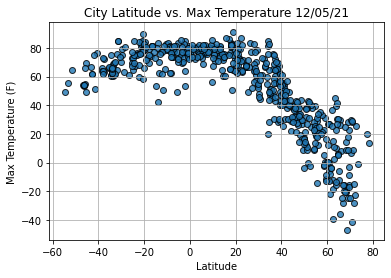

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

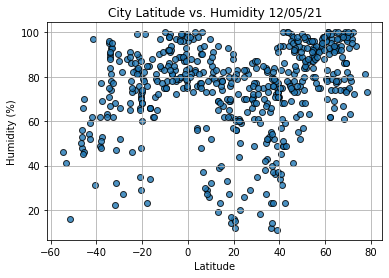

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

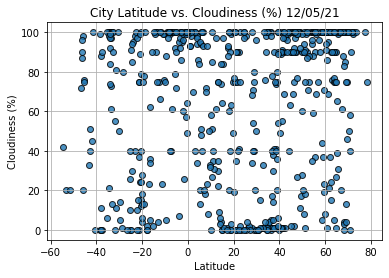

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

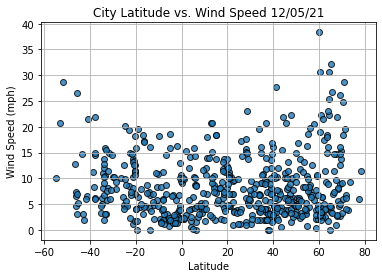

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [23]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [24]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [25]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

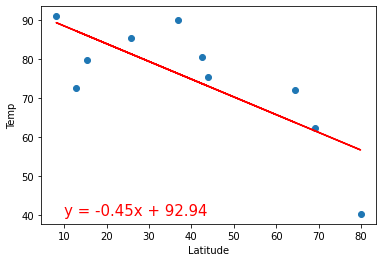

In [26]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]

In [29]:
index13

City                   Bredasdorp
Country                        ZA
Date          2021-12-05 22:05:22
Lat                      -34.5322
Lng                       20.0403
Max Temp                    60.28
Humidity                       96
Cloudiness                    100
Wind Speed                   8.05
Name: 13, dtype: object

In [30]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
545     True
546     True
547    False
548     True
549     True
Name: Lat, Length: 550, dtype: bool

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Deputatskiy,RU,2021-12-05 22:05:18,69.3000,139.9000,-24.45,97,100,2.75
5,Ler,SS,2021-12-05 22:05:19,8.3018,30.1418,80.56,29,23,5.23
7,Baghpat,IN,2021-12-05 22:05:20,28.9500,77.2167,70.29,49,80,5.14
9,Bol,TD,2021-12-05 22:05:21,13.4586,14.7147,76.32,39,9,15.08
10,Victoria,HK,2021-12-05 22:03:14,22.2855,114.1577,64.33,61,41,1.01


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

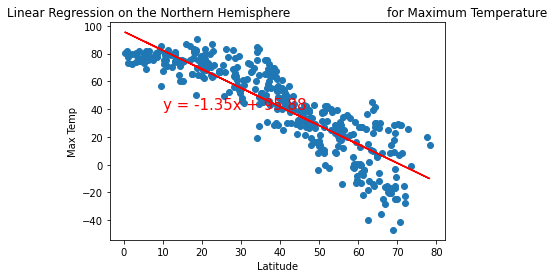

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

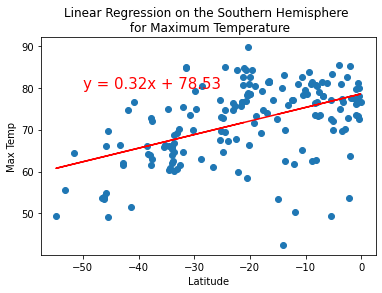

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

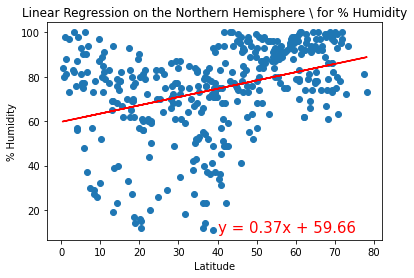

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

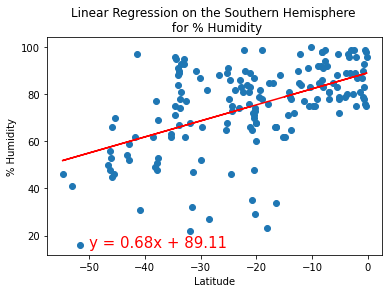

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

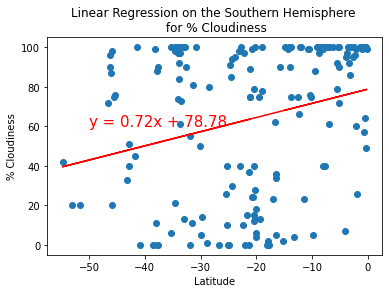

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

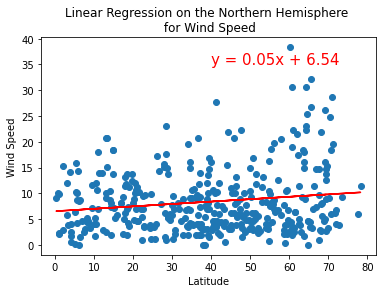

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

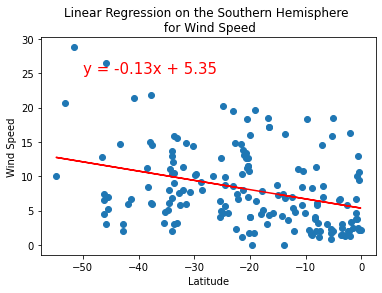

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))